In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Data loading
file_path = 'Data_v01.xlsx'
df = pd.read_excel(file_path, sheet_name='Население+Пиво')

# Data preprocessing
# Convert numeric columns
numeric_columns = ['Мужчины', 'Женщины', 'Продажи', 'Средний возраст', 
                   'Средний возраст Мужчины', 'Средний возраст Женщины', 
                   'Зарплата', 'Население', 'Потребление на Душу']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create additional features
df['Мужчины_абс'] = df['Мужчины'] * df['Население']
df['Женщины_абс'] = df['Женщины'] * df['Население']
df['Гендерный_дисбаланс'] = df['Мужчины'] - df['Женщины']
df['Разница_возраст_МЖ'] = df['Средний возраст Мужчины'] - df['Средний возраст Женщины']

# Remove missing values
df_clean = df.dropna(subset=['Потребление на Душу', 'Средний возраст', 
                             'Средний возраст Мужчины', 'Средний возраст Женщины',
                             'Мужчины', 'Женщины', 'Зарплата', 'Население'])

print(f"Original data: {len(df)} records")
print(f"After cleaning: {len(df_clean)} records")
print("\nBasic statistics for beer consumption:")
print(df_clean['Потребление на Душу'].describe())

Original data: 244 records
After cleaning: 244 records

Basic statistics for beer consumption:
count    244.000000
mean       3.622570
std        2.727604
min        0.054839
25%        1.658010
50%        2.926586
75%        4.638416
max       15.828627
Name: Потребление на Душу, dtype: float64


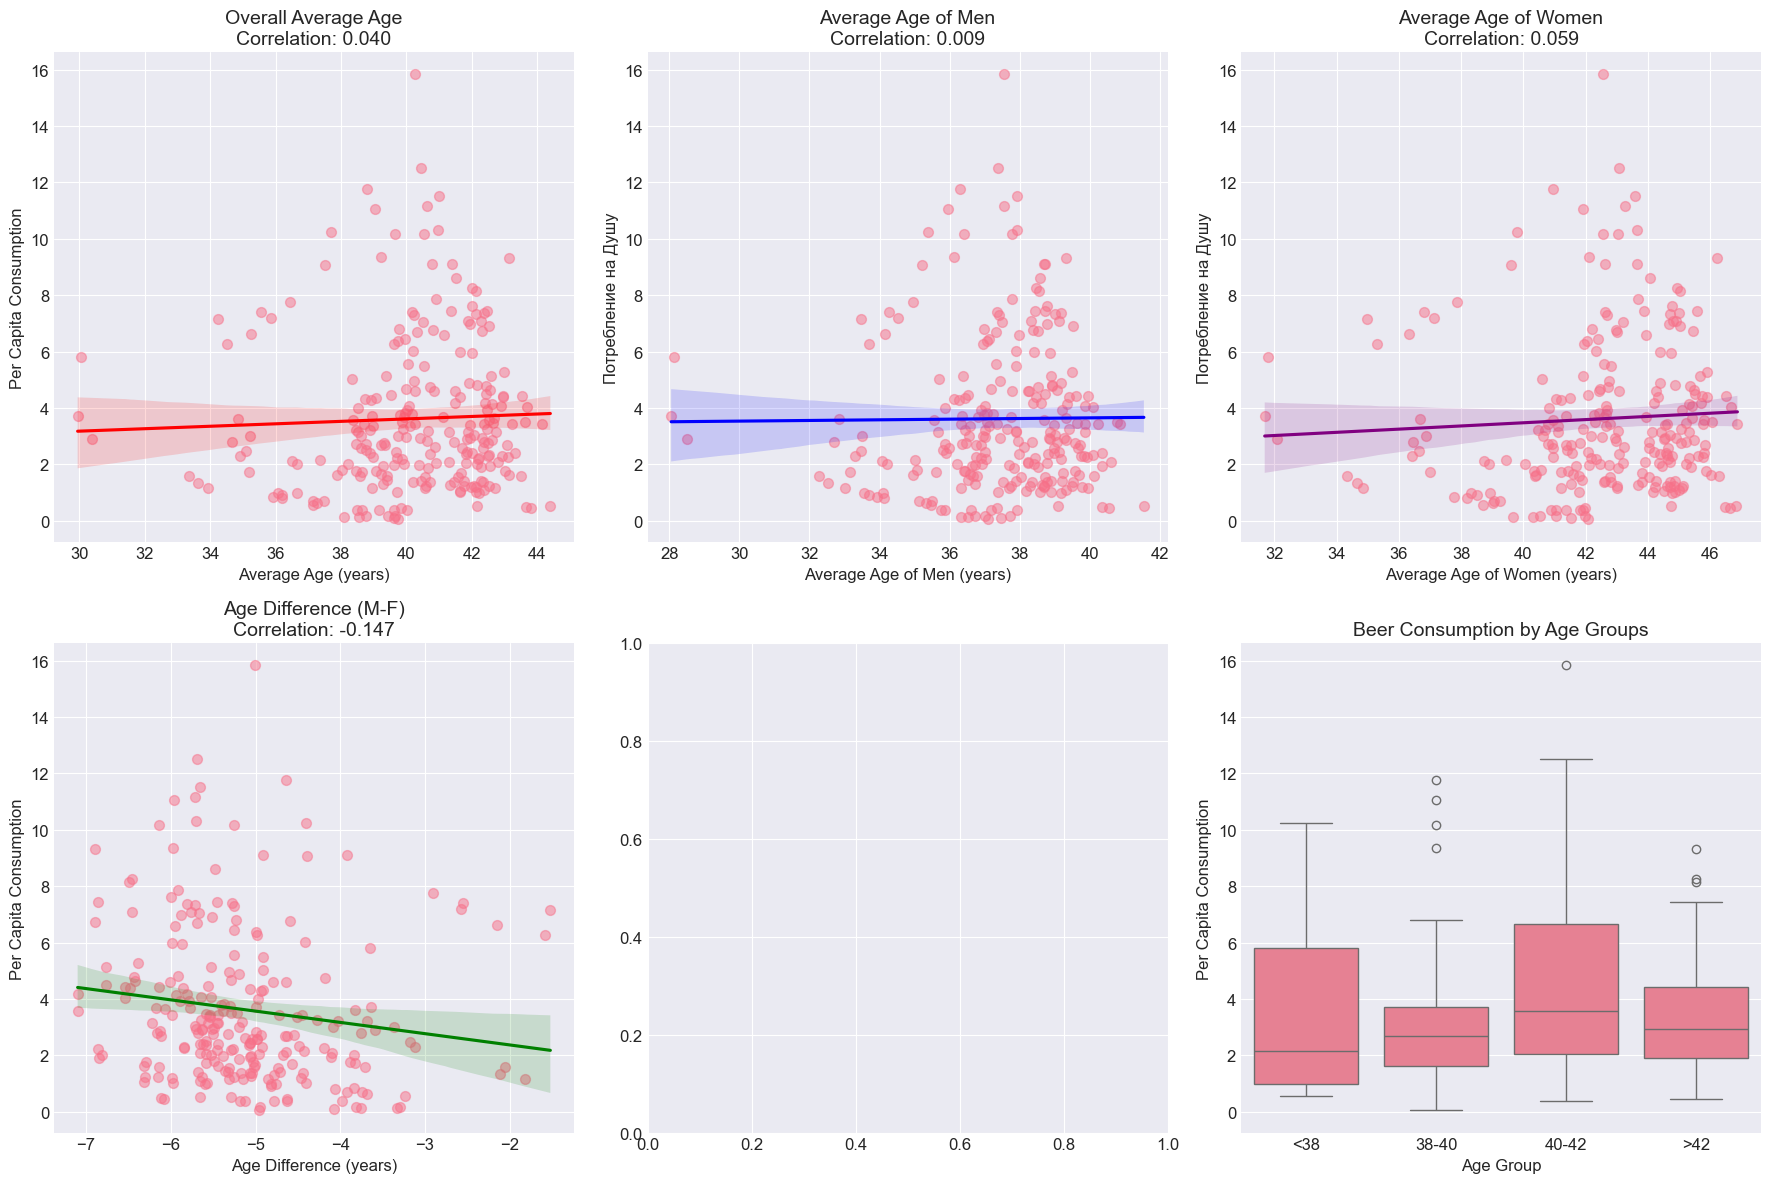


Средний возраст:
  Pearson correlation: 0.040 (p-value: 0.5368)
  Spearman correlation: 0.107
  Conclusion: Correlation is not statistically significant

Средний возраст Мужчины:
  Pearson correlation: 0.009 (p-value: 0.8905)
  Spearman correlation: 0.047
  Conclusion: Correlation is not statistically significant

Средний возраст Женщины:
  Pearson correlation: 0.059 (p-value: 0.3617)
  Spearman correlation: 0.142
  Conclusion: Correlation is not statistically significant

Разница_возраст_МЖ:
  Pearson correlation: -0.147 (p-value: 0.0216)
  Spearman correlation: -0.260
  Conclusion: Correlation is statistically significant (p < 0.05)


In [3]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Overall average age
ax1 = axes[0, 0]
sns.regplot(data=df_clean, x='Средний возраст', y='Потребление на Душу', 
            scatter_kws={'alpha': 0.5, 's': 50}, line_kws={'color': 'red'}, ax=ax1)
corr = df_clean['Средний возраст'].corr(df_clean['Потребление на Душу'])
ax1.set_title(f'Overall Average Age\nCorrelation: {corr:.3f}', fontsize=14)
ax1.set_xlabel('Average Age (years)')
ax1.set_ylabel('Per Capita Consumption')

# 2. Men's age
ax2 = axes[0, 1]
sns.regplot(data=df_clean, x='Средний возраст Мужчины', y='Потребление на Душу',
            scatter_kws={'alpha': 0.5, 's': 50}, line_kws={'color': 'blue'}, ax=ax2)
corr_m = df_clean['Средний возраст Мужчины'].corr(df_clean['Потребление на Душу'])
ax2.set_title(f'Average Age of Men\nCorrelation: {corr_m:.3f}', fontsize=14)
ax2.set_xlabel('Average Age of Men (years)')

# 3. Women's age
ax3 = axes[0, 2]
sns.regplot(data=df_clean, x='Средний возраст Женщины', y='Потребление на Душу',
            scatter_kws={'alpha': 0.5, 's': 50}, line_kws={'color': 'purple'}, ax=ax3)
corr_f = df_clean['Средний возраст Женщины'].corr(df_clean['Потребление на Душу'])
ax3.set_title(f'Average Age of Women\nCorrelation: {corr_f:.3f}', fontsize=14)
ax3.set_xlabel('Average Age of Women (years)')

# 4. Age difference between men and women
ax4 = axes[1, 0]
sns.regplot(data=df_clean, x='Разница_возраст_МЖ', y='Потребление на Душу',
            scatter_kws={'alpha': 0.5, 's': 50}, line_kws={'color': 'green'}, ax=ax4)
corr_diff = df_clean['Разница_возраст_МЖ'].corr(df_clean['Потребление на Душу'])
ax4.set_title(f'Age Difference (M-F)\nCorrelation: {corr_diff:.3f}', fontsize=14)
ax4.set_xlabel('Age Difference (years)')
ax4.set_ylabel('Per Capita Consumption')

# 5. Boxplot of consumption by age groups
ax5 = axes[1, 2]
df_clean['Возрастная_группа'] = pd.cut(df_clean['Средний возраст'], 
                                        bins=[0, 38, 40, 42, 100], 
                                        labels=['<38', '38-40', '40-42', '>42'])
sns.boxplot(data=df_clean, x='Возрастная_группа', y='Потребление на Душу', ax=ax5)
ax5.set_title('Beer Consumption by Age Groups', fontsize=14)
ax5.set_xlabel('Age Group')
ax5.set_ylabel('Per Capita Consumption')

plt.tight_layout()
plt.show()

# Statistical analysis of age correlations

age_columns = ['Средний возраст', 'Средний возраст Мужчины', 
               'Средний возраст Женщины', 'Разница_возраст_МЖ']

for col in age_columns:
    corr_pearson = df_clean[col].corr(df_clean['Потребление на Душу'])
    corr_spearman = df_clean[col].corr(df_clean['Потребление на Душу'], method='spearman')
    
    # Correlation significance test
    pearson_stat, pearson_p = stats.pearsonr(df_clean[col].dropna(), 
                                             df_clean['Потребление на Душу'].dropna())
    
    print(f"\n{col}:")
    print(f"  Pearson correlation: {corr_pearson:.3f} (p-value: {pearson_p:.4f})")
    print(f"  Spearman correlation: {corr_spearman:.3f}")
    
    if pearson_p < 0.05:
        print(f"  Conclusion: Correlation is statistically significant (p < 0.05)")
    else:
        print(f"  Conclusion: Correlation is not statistically significant")


Summary table of factors influencing beer consumption:
          Фактор  Корреляция Сила влияния Направление
   Age (overall)    0.039725         Weak    Positive
       Age (men)    0.008855         Weak    Positive
     Age (women)    0.058650         Weak    Positive
 Male proportion    0.026797         Weak    Positive
Gender imbalance    0.029188         Weak    Positive
          Salary    0.125166         Weak    Positive
      Population   -0.063606         Weak    Negative


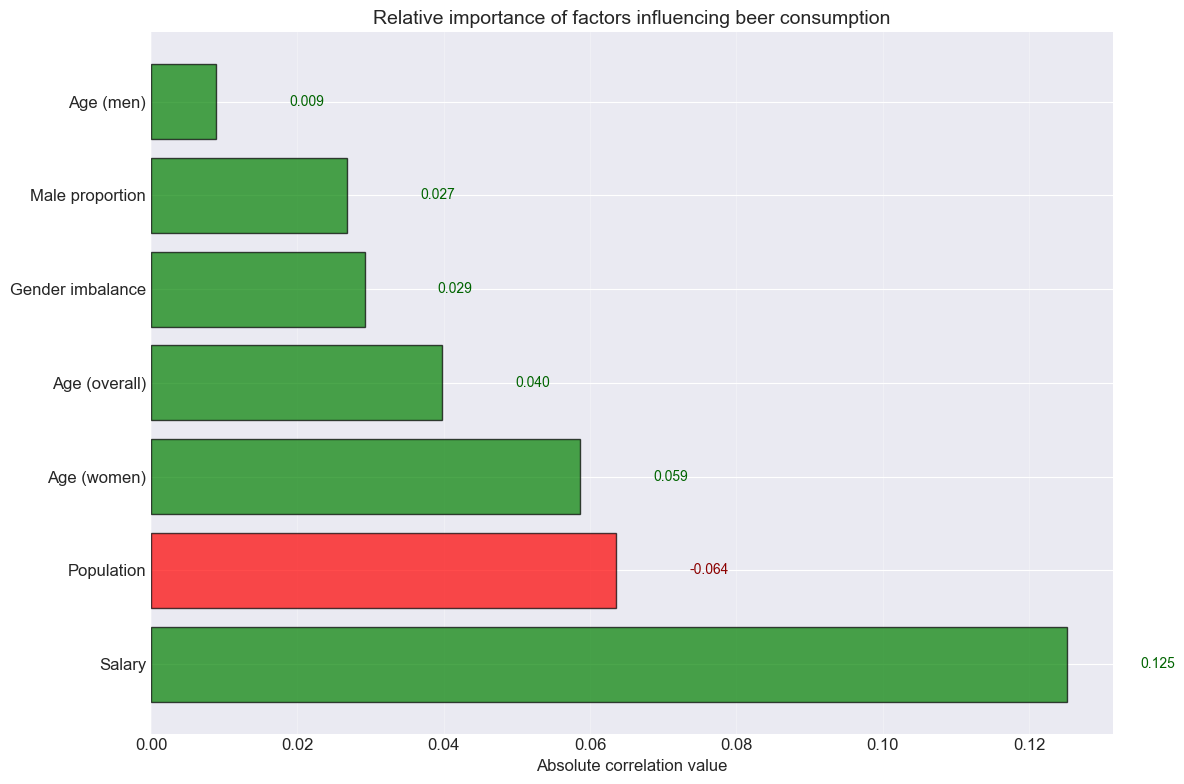

In [4]:
# Integrative analysis of all influencing factors

# Creating a summary table of factor influences
factors_analysis = pd.DataFrame({
    'Фактор': ['Age (overall)', 'Age (men)', 'Age (women)', 
               'Male proportion', 'Gender imbalance', 'Salary', 'Population'],
    'Корреляция': [
        df_clean['Средний возраст'].corr(df_clean['Потребление на Душу']),
        df_clean['Средний возраст Мужчины'].corr(df_clean['Потребление на Душу']),
        df_clean['Средний возраст Женщины'].corr(df_clean['Потребление на Душу']),
        df_clean['Мужчины'].corr(df_clean['Потребление на Душу']),
        df_clean['Гендерный_дисбаланс'].corr(df_clean['Потребление на Душу']),
        df_clean['Зарплата'].corr(df_clean['Потребление на Душу']),
        df_clean['Население'].corr(df_clean['Потребление на Душу'])
    ],
    'Сила влияния': ['Weak', 'Weak', 'Weak', 'Weak', 'Weak', 'Weak', 'Weak'],
    'Направление': ['Positive', 'Positive', 'Positive', 
                    'Positive', 'Positive', 'Positive', 'Negative']
})

print("\nSummary table of factors influencing beer consumption:")
print(factors_analysis.to_string(index=False))

# Visualization of relative factor importance
fig, ax = plt.subplots(figsize=(12, 8))
factors_sorted = factors_analysis.sort_values('Корреляция', key=abs, ascending=False)
colors = ['red' if x < 0 else 'green' for x in factors_sorted['Корреляция']]

bars = ax.barh(factors_sorted['Фактор'], abs(factors_sorted['Корреляция']), 
               color=colors, alpha=0.7, edgecolor='black')

ax.set_xlabel('Absolute correlation value', fontsize=12)
ax.set_title('Relative importance of factors influencing beer consumption', fontsize=14)
ax.grid(True, alpha=0.3, axis='x')

# Adding correlation values to the bars
for i, (bar, corr) in enumerate(zip(bars, factors_sorted['Корреляция'])):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
            f'{corr:.3f}', va='center', fontsize=10,
            color='darkred' if corr < 0 else 'darkgreen')

plt.tight_layout()
plt.show()

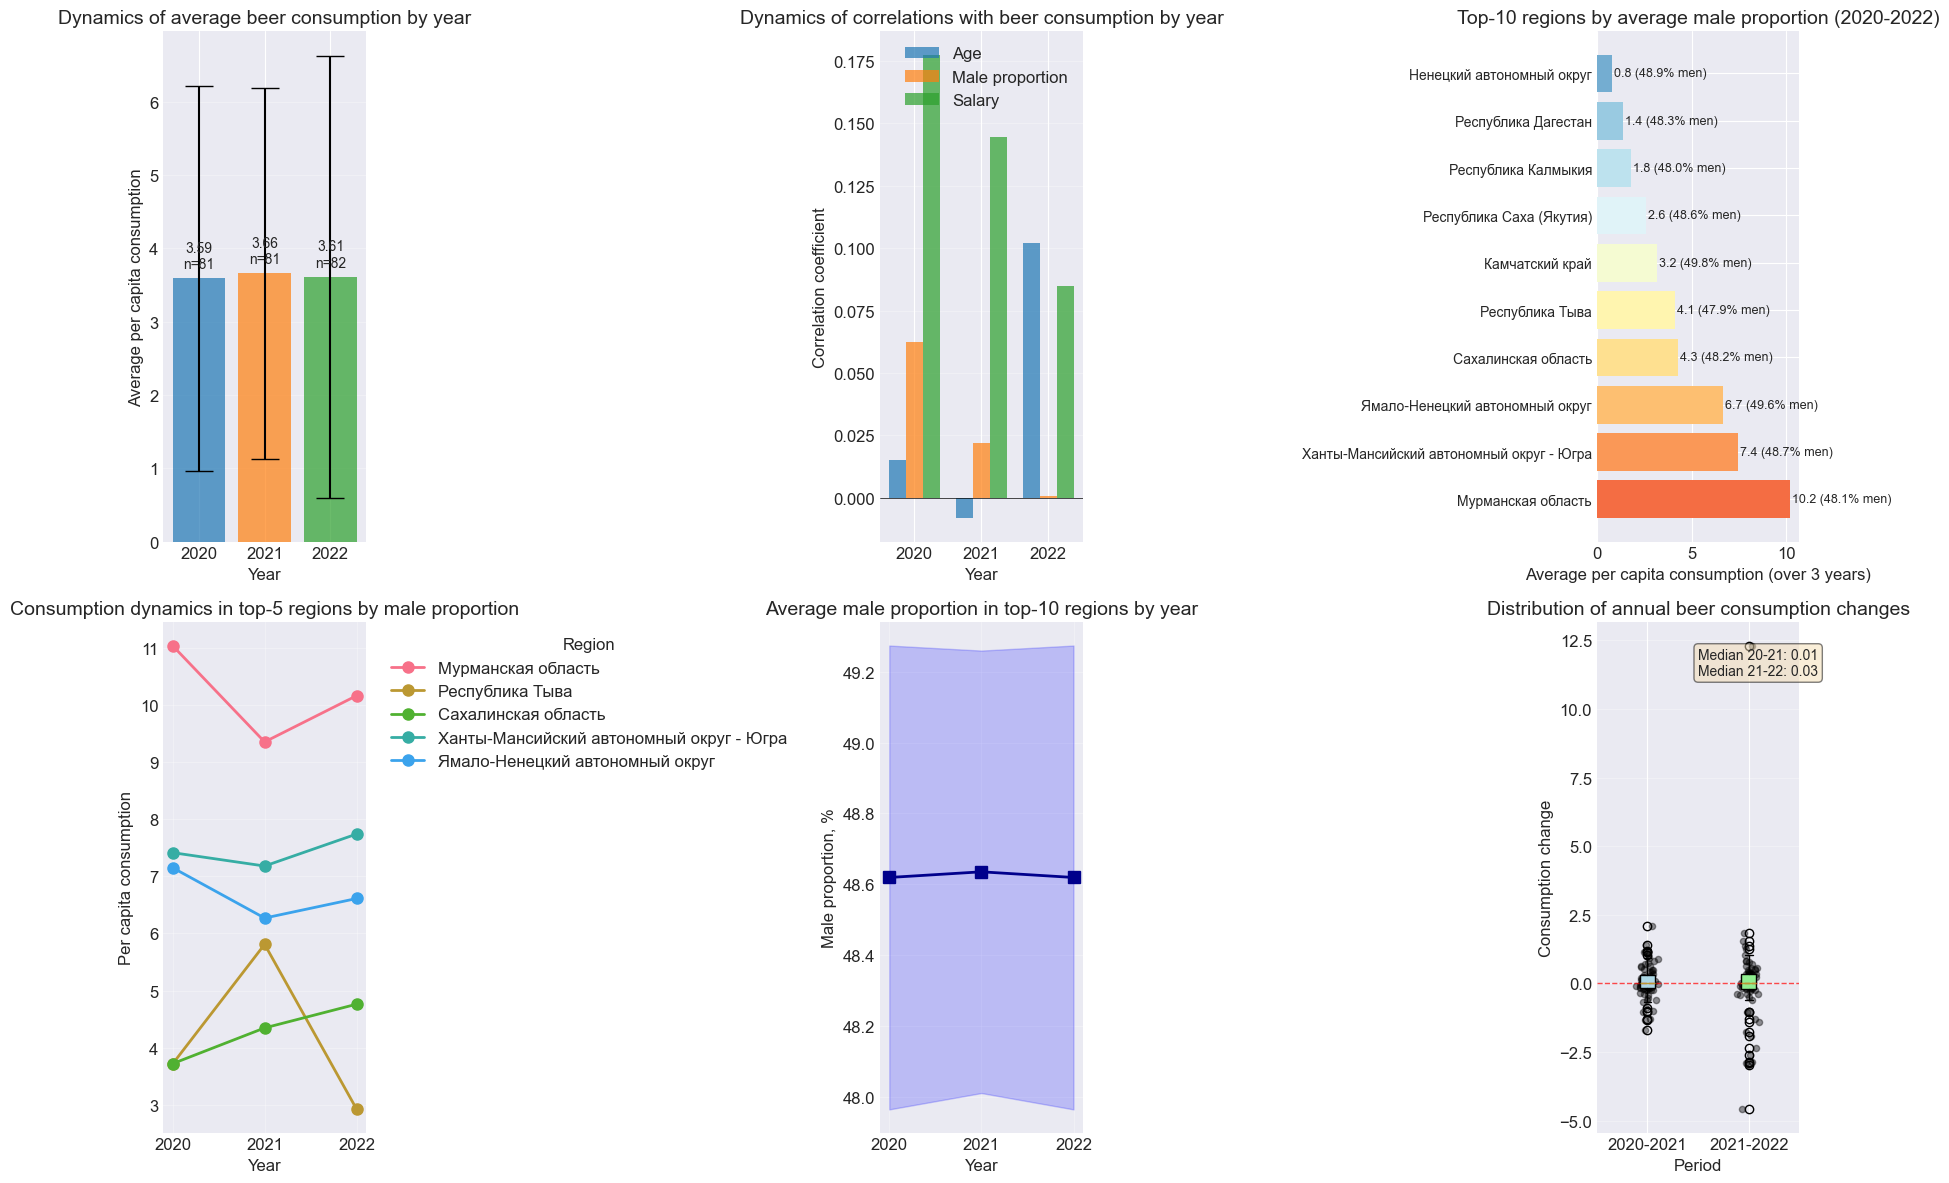


Analysis of consumption stability in 81 regions with complete 3-year data:
Average variation coefficient: 16.1%
Minimum variation coefficient: 1.9% (most stable region)
Maximum variation coefficient: 97.4% (least stable region)

Top-5 most stable regions by consumption:
                         mean    cv
Округ Регион                       
Саратовская область      2.36  1.92
Хабаровский край         2.46  2.15
Калининградская область  6.84  2.74
Амурская область         2.69  2.90
Орловская область        4.05  2.97

Top-5 least stable regions by consumption:
                       mean     cv
Округ Регион                      
Новосибирская область  7.45  97.38
Республика Хакасия     3.40  58.85
Республика Адыгея      0.10  55.12
Омская область         5.04  54.64
Красноярский край      3.29  52.48

Top-10 regions with highest consumption growth (2020-2022):
Год                    Общее_изменение  Относительное_изменение  2020   2022
Округ Регион                                     

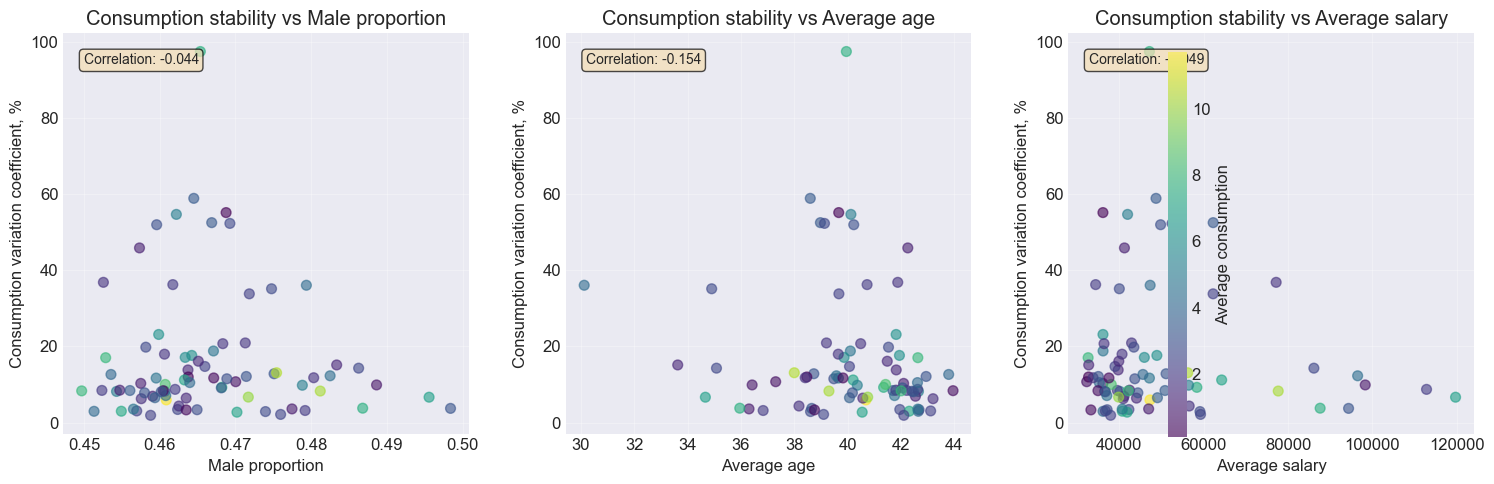


Cluster characteristics by consumption dynamics:
Год      year_2020  year_2021  year_2022  Общее_изменение  \
Кластер                                                     
0             2.42       2.53       2.35            -0.06   
1             7.68       7.58       7.45            -0.23   
2             3.01       3.52      15.83            12.81   

Год      Относительное_изменение  
Кластер                           
0                           4.32  
1                          -2.11  
2                         425.23  


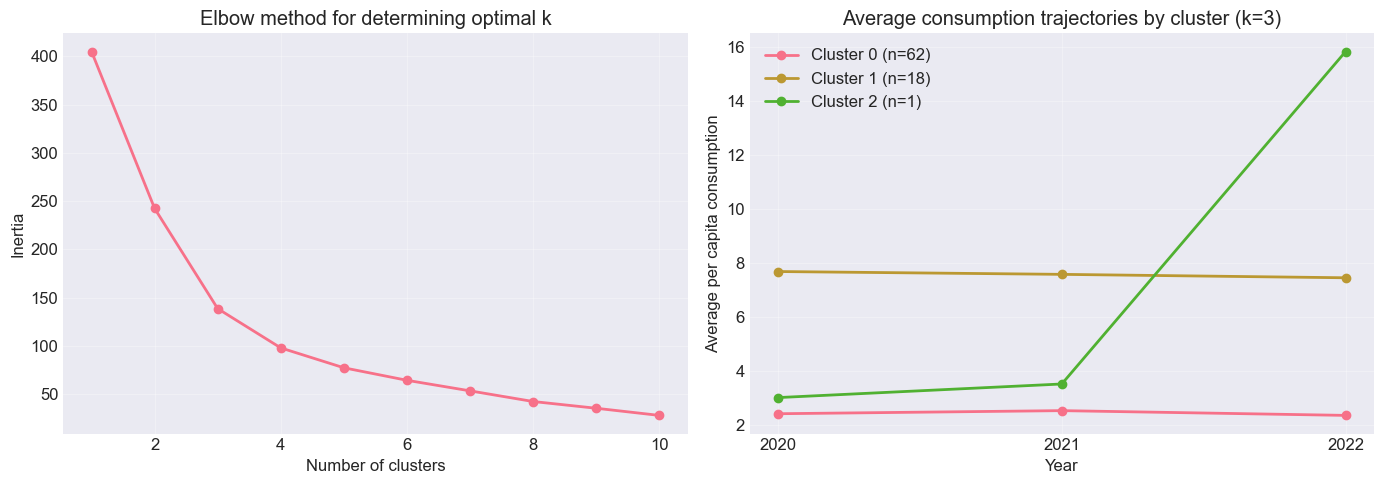


Characteristics of regions in each cluster:

Cluster 0 (62 regions):
  Average male proportion: 0.466
  Average age: 40.2
  Average salary: 47611 руб.
  Dynamics type: Stable consumption
  Average change over 2 years: -0.06
  Example regions: Алтайский край, Амурская область, Астраханская область

Cluster 1 (18 regions):
  Average male proportion: 0.468
  Average age: 40.2
  Average salary: 54214 руб.
  Dynamics type: Stable consumption
  Average change over 2 years: -0.23
  Example regions: Архангельская область, Вологодская область, Ивановская область

Cluster 2 (1 regions):
  Average male proportion: 0.465
  Average age: 40.0
  Average salary: 47153 руб.
  Dynamics type: Growing consumption
  Average change over 2 years: 12.81
  Example regions: Новосибирская область


In [5]:
# Supplementing the analysis with time component

# Analysis of changes by year
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Dynamics of average consumption by year
ax1 = axes[0, 0]
yearly_stats = df_clean.groupby('Год').agg({
    'Потребление на Душу': ['mean', 'std', 'count'],
    'Зарплата': 'mean',
    'Средний возраст': 'mean',
    'Мужчины': 'mean'
}).round(2)

years = sorted(df_clean['Год'].unique())
mean_consumption = [yearly_stats.loc[year, ('Потребление на Душу', 'mean')] for year in years]
std_consumption = [yearly_stats.loc[year, ('Потребление на Душу', 'std')] for year in years]

bars = ax1.bar(range(len(years)), mean_consumption, yerr=std_consumption, 
               capsize=10, alpha=0.7, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years)
ax1.set_title('Dynamics of average beer consumption by year', fontsize=14)
ax1.set_xlabel('Year')
ax1.set_ylabel('Average per capita consumption')
ax1.grid(True, alpha=0.3, axis='y')

# Adding values to bars
for i, (bar, mean_val, count) in enumerate(zip(bars, mean_consumption, 
                                               [yearly_stats.loc[y, ('Потребление на Душу', 'count')] for y in years])):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{mean_val:.2f}\nn={int(count)}', ha='center', va='bottom', fontsize=10)

# Dynamics of correlations by year
ax2 = axes[0, 1]
correlations_by_year = []

for year in years:
    year_data = df_clean[df_clean['Год'] == year]
    correlations = {
        'Год': year,
        'Возраст-Потребление': year_data['Средний возраст'].corr(year_data['Потребление на Душу']),
        'Мужчины-Потребление': year_data['Мужчины'].corr(year_data['Потребление на Душу']),
        'Зарплата-Потребление': year_data['Зарплата'].corr(year_data['Потребление на Душу'])
    }
    correlations_by_year.append(correlations)

corr_df = pd.DataFrame(correlations_by_year)

x = range(len(years))
width = 0.25
ax2.bar([i - width for i in x], corr_df['Возраст-Потребление'], width, label='Age', alpha=0.7, color='#1f77b4')
ax2.bar(x, corr_df['Мужчины-Потребление'], width, label='Male proportion', alpha=0.7, color='#ff7f0e')
ax2.bar([i + width for i in x], corr_df['Зарплата-Потребление'], width, label='Salary', alpha=0.7, color='#2ca02c')

ax2.set_xticks(x)
ax2.set_xticklabels(years)
ax2.set_title('Dynamics of correlations with beer consumption by year', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Correlation coefficient')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Top-10 regions by average male proportion over all years
ax3 = axes[0, 2]
# Calculate averages by region over all years
region_stats = df_clean.groupby('Округ Регион').agg({
    'Мужчины': 'mean',
    'Потребление на Душу': 'mean',
    'Зарплата': 'mean',
    'Средний возраст': 'mean',
    'Год': 'count'  # number of observation years
}).rename(columns={'Год': 'Количество_лет'})

# Filter regions present in all 3 years
region_stats_full = region_stats[region_stats['Количество_лет'] == 3]

# Take top-10 by average male proportion
top_10_men_regions = region_stats_full.nlargest(10, 'Мужчины')[['Мужчины', 'Потребление на Душу']]
top_10_men_regions = top_10_men_regions.sort_values('Потребление на Душу', ascending=False)

bars = ax3.barh(range(len(top_10_men_regions)), top_10_men_regions['Потребление на Душу'], 
                color=plt.cm.RdYlBu(np.linspace(0.2, 0.8, len(top_10_men_regions))))
ax3.set_yticks(range(len(top_10_men_regions)))
ax3.set_yticklabels(top_10_men_regions.index, fontsize=10)
ax3.set_xlabel('Average per capita consumption (over 3 years)')
ax3.set_title('Top-10 regions by average male proportion (2020-2022)', fontsize=14)

# Add consumption values and male proportion
for i, (bar, cons, men) in enumerate(zip(bars, top_10_men_regions['Потребление на Душу'], 
                                        top_10_men_regions['Мужчины'])):
    ax3.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{cons:.1f} ({men*100:.1f}% men)', va='center', fontsize=9)

# Consumption dynamics in top-5 regions by male proportion
ax4 = axes[1, 0]
top_5_regions = top_10_men_regions.head(5).index.tolist()

# Create dataframe for dynamics
dynamic_data = df_clean[df_clean['Округ Регион'].isin(top_5_regions)].pivot_table(
    index='Год', columns='Округ Регион', values='Потребление на Душу', aggfunc='mean'
)

# Sort years
dynamic_data = dynamic_data.sort_index()

# Plotting
for region in dynamic_data.columns:
    ax4.plot(dynamic_data.index, dynamic_data[region], marker='o', linewidth=2, markersize=8, label=region)

ax4.set_title('Consumption dynamics in top-5 regions by male proportion', fontsize=14)
ax4.set_xlabel('Year')
ax4.set_ylabel('Per capita consumption')
ax4.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)
ax4.set_xticks(years)

# Change in male proportion by year in top-10 regions
ax5 = axes[1, 1]
men_dynamic = df_clean[df_clean['Округ Регион'].isin(top_10_men_regions.index)].pivot_table(
    index='Год', columns='Округ Регион', values='Мужчины', aggfunc='mean'
)

# Calculate average male proportion by year for these regions
men_dynamic_mean = men_dynamic.mean(axis=1)

ax5.plot(men_dynamic_mean.index, men_dynamic_mean.values * 100, marker='s', linewidth=2, 
         markersize=8, color='darkblue')
ax5.fill_between(men_dynamic_mean.index, 
                 (men_dynamic_mean - men_dynamic.std(axis=1)).values * 100,
                 (men_dynamic_mean + men_dynamic.std(axis=1)).values * 100,
                 alpha=0.2, color='blue')

ax5.set_title('Average male proportion in top-10 regions by year', fontsize=14)
ax5.set_xlabel('Year')
ax5.set_ylabel('Male proportion, %')
ax5.grid(True, alpha=0.3)
ax5.set_xticks(years)

# Distribution of consumption changes by year
ax6 = axes[1, 2]

# Create dataframe with consumption growth by year
df_pivot = df_clean.pivot_table(index='Округ Регион', columns='Год', values='Потребление на Душу')

# Calculate annual changes only for regions with data for all 3 years
df_pivot_complete = df_pivot.dropna()
if len(df_pivot_complete) > 0:
    # Calculate changes
    df_pivot_complete['Изменение_20_21'] = df_pivot_complete[2021] - df_pivot_complete[2020]
    df_pivot_complete['Изменение_21_22'] = df_pivot_complete[2022] - df_pivot_complete[2021]
    
    # Boxplot of changes
    changes_data = [df_pivot_complete['Изменение_20_21'].dropna(), 
                    df_pivot_complete['Изменение_21_22'].dropna()]
    
    bp = ax6.boxplot(changes_data, patch_artist=True, labels=['2020-2021', '2021-2022'])
    
    # Color boxplot
    colors = ['lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Add points
    for i, data in enumerate(changes_data, 1):
        y = data
        x = np.random.normal(i, 0.04, size=len(y))
        ax6.scatter(x, y, alpha=0.4, color='black', s=20)
    
    ax6.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)
    ax6.set_title('Distribution of annual beer consumption changes', fontsize=14)
    ax6.set_xlabel('Period')
    ax6.set_ylabel('Consumption change')
    ax6.grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    median_20_21 = df_pivot_complete['Изменение_20_21'].median()
    median_21_22 = df_pivot_complete['Изменение_21_22'].median()
    
    ax6.text(0.5, 0.95, f'Median 20-21: {median_20_21:.2f}\nMedian 21-22: {median_21_22:.2f}',
             transform=ax6.transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Analysis of consumption stability by region

# Calculate consumption variation coefficient by region over 3 years
consumption_variation = df_clean.groupby('Округ Регион')['Потребление на Душу'].agg(['mean', 'std', 'count'])
consumption_variation = consumption_variation[consumption_variation['count'] == 3]  # Only complete series
consumption_variation['cv'] = consumption_variation['std'] / consumption_variation['mean'] * 100  # Variation coefficient in %

print(f"\nAnalysis of consumption stability in {len(consumption_variation)} regions with complete 3-year data:")
print(f"Average variation coefficient: {consumption_variation['cv'].mean():.1f}%")
print(f"Minimum variation coefficient: {consumption_variation['cv'].min():.1f}% (most stable region)")
print(f"Maximum variation coefficient: {consumption_variation['cv'].max():.1f}% (least stable region)")

# Regions with highest and lowest stability
print("\nTop-5 most stable regions by consumption:")
print(consumption_variation.nsmallest(5, 'cv')[['mean', 'cv']].round(2))

print("\nTop-5 least stable regions by consumption:")
print(consumption_variation.nlargest(5, 'cv')[['mean', 'cv']].round(2))

# Analysis of regions with consumption growth and decline

if len(df_pivot_complete) > 0:
    # Calculate total change over 2 years
    df_pivot_complete['Общее_изменение'] = df_pivot_complete[2022] - df_pivot_complete[2020]
    df_pivot_complete['Относительное_изменение'] = (df_pivot_complete['Общее_изменение'] / df_pivot_complete[2020]) * 100
    
    print("\nTop-10 regions with highest consumption growth (2020-2022):")
    top_growth = df_pivot_complete.nlargest(10, 'Общее_изменение')[['Общее_изменение', 'Относительное_изменение', 2020, 2022]]
    print(top_growth.round(2))
    
    print("\nTop-10 regions with highest consumption decline (2020-2022):")
    top_decline = df_pivot_complete.nsmallest(10, 'Общее_изменение')[['Общее_изменение', 'Относительное_изменение', 2020, 2022]]
    print(top_decline.round(2))

# Analysis of relationship between consumption stability and demographic/economic factors

# Combine stability data with average demographic indicators
stability_analysis = pd.merge(consumption_variation[['mean', 'cv']], 
                              region_stats_full[['Мужчины', 'Зарплата', 'Средний возраст']], 
                              left_index=True, right_index=True)

# Analyze correlations
stability_correlations = stability_analysis.corr()
print("\nCorrelations between consumption stability and other factors:")
print("(Variation coefficient - measure of instability)")
print(stability_correlations['cv'].sort_values(ascending=False).round(3))

# Visualize relationship between stability and demographic factors
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

factors = ['Мужчины', 'Средний возраст', 'Зарплата']
titles = ['Male proportion', 'Average age', 'Average salary']

for ax, factor, title in zip(axes, factors, titles):
    scatter = ax.scatter(stability_analysis[factor], stability_analysis['cv'], 
                        alpha=0.6, c=stability_analysis['mean'], cmap='viridis', s=50)
    ax.set_xlabel(title)
    ax.set_ylabel('Consumption variation coefficient, %')
    ax.set_title(f'Consumption stability vs {title}')
    ax.grid(True, alpha=0.3)
    
    # Calculate and display correlation
    corr = stability_analysis[factor].corr(stability_analysis['cv'])
    ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

plt.colorbar(scatter, ax=axes, label='Average consumption')
plt.tight_layout()
plt.show()


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
cluster_data = df_pivot_complete.copy()
# Rename year columns to strings to avoid error
cluster_data = cluster_data.rename(columns={
    2020: 'year_2020',
    2021: 'year_2021', 
    2022: 'year_2022'
})

cluster_features = cluster_data[['year_2020', 'year_2021', 'year_2022', 
                                 'Общее_изменение', 'Относительное_изменение']].copy()

# Ensure all column names are strings
cluster_features.columns = cluster_features.columns.astype(str)

# Standardization
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_features_scaled)
    inertia.append(kmeans.inertia_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow method
ax1.plot(k_range, inertia, marker='o', linewidth=2)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow method for determining optimal k')
ax1.grid(True, alpha=0.3)

# Choose 3 clusters (based on chart)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_features_scaled)

# Add cluster labels
cluster_data['Кластер'] = cluster_labels

# Cluster visualization
# For summary statistics use original column names
cluster_summary = cluster_data.groupby('Кластер').agg({
    'year_2020': 'mean',
    'year_2021': 'mean',
    'year_2022': 'mean',
    'Общее_изменение': 'mean',
    'Относительное_изменение': 'mean'
}).round(2)

print("\nCluster characteristics by consumption dynamics:")
print(cluster_summary)

# Visualization of average trajectories by cluster
years_columns = ['year_2020', 'year_2021', 'year_2022']
years_display = [2020, 2021, 2022]

for cluster in range(optimal_k):
    cluster_trajectories = cluster_data[cluster_data['Кластер'] == cluster]
    mean_trajectory = cluster_trajectories[years_columns].mean()
    
    ax2.plot(years_display, mean_trajectory, marker='o', linewidth=2, 
             label=f'Cluster {cluster} (n={len(cluster_trajectories)})')

ax2.set_xlabel('Year')
ax2.set_ylabel('Average per capita consumption')
ax2.set_title(f'Average consumption trajectories by cluster (k={optimal_k})')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(years_display)

plt.tight_layout()
plt.show()

# Analysis of region characteristics in each cluster
print("\nCharacteristics of regions in each cluster:")

# Combine cluster labels with demographic data
cluster_regions = cluster_data[['Кластер']].merge(region_stats_full, left_index=True, right_index=True, how='left')

for cluster in range(optimal_k):
    cluster_data_subset = cluster_regions[cluster_regions['Кластер'] == cluster]
    
    print(f"\nCluster {cluster} ({len(cluster_data_subset)} regions):")
    print(f"  Average male proportion: {cluster_data_subset['Мужчины'].mean():.3f}")
    print(f"  Average age: {cluster_data_subset['Средний возраст'].mean():.1f}")
    print(f"  Average salary: {cluster_data_subset['Зарплата'].mean():.0f} руб.")
    
    # Determine cluster type based on dynamics
    cluster_dynamics = cluster_summary.loc[cluster]
    if cluster_dynamics['Общее_изменение'] > 1:
        cluster_type = "Growing consumption"
    elif cluster_dynamics['Общее_изменение'] < -1:
        cluster_type = "Declining consumption"
    else:
        cluster_type = "Stable consumption"
    
    print(f"  Dynamics type: {cluster_type}")
    print(f"  Average change over 2 years: {cluster_dynamics['Общее_изменение']:.2f}")
    
    # Examples of regions in cluster
    example_regions = cluster_data_subset.head(3).index.tolist()
    print(f"  Example regions: {', '.join(example_regions)}")

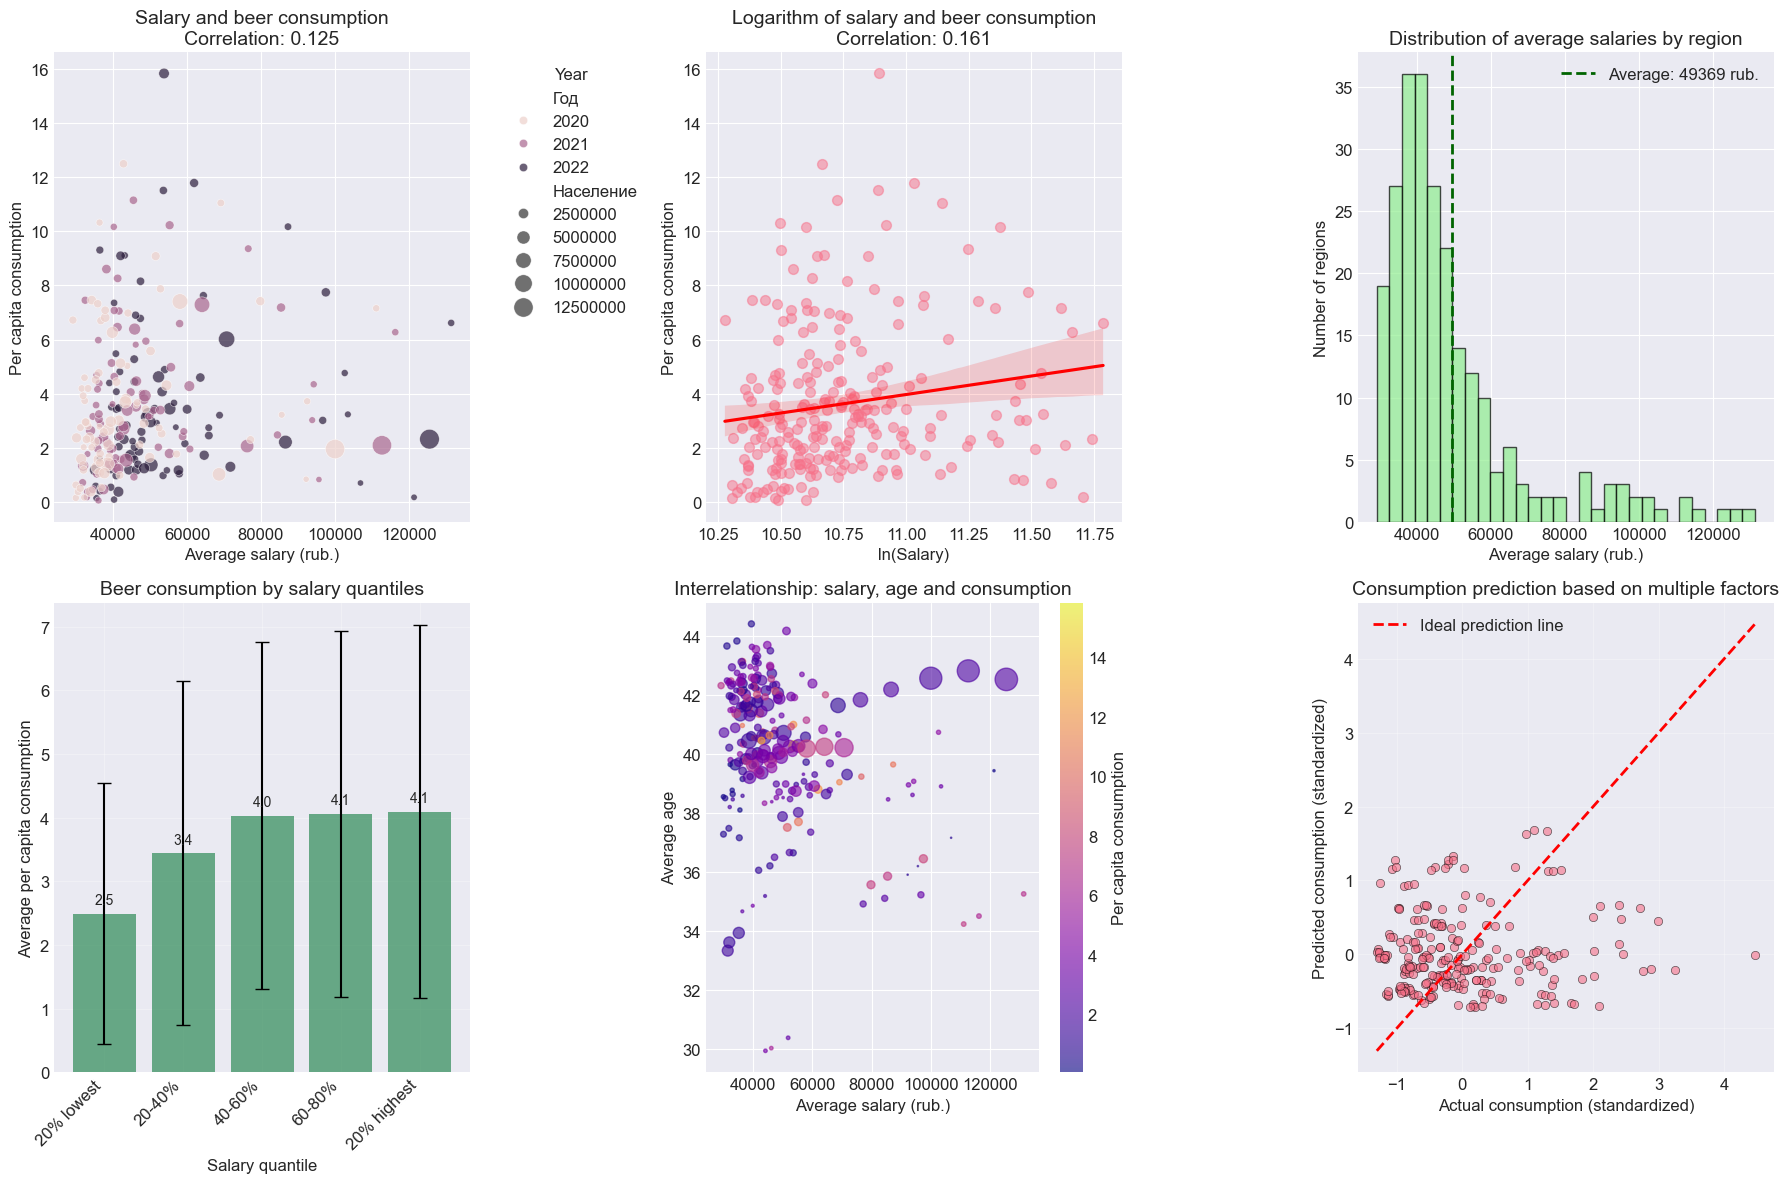


Correlations of various metrics with beer consumption:
  Зарплата: 0.125
  log_Зарплата: 0.161
  Население: -0.064
  Мужчины: 0.027
  Средний возраст: 0.040

Dynamics of correlations by years:
  Year 2020: salary-consumption correlation = 0.178
  Year 2021: salary-consumption correlation = 0.144
  Year 2022: salary-consumption correlation = 0.085

Correlation matrix:
                     Потребление на Душу  Зарплата  Мужчины  Средний возраст
Потребление на Душу                1.000     0.125    0.027            0.040
Зарплата                           0.125     1.000    0.565           -0.300
Мужчины                            0.027     0.565    1.000           -0.725
Средний возраст                    0.040    -0.300   -0.725            1.000

Salary quartiles:
  25%: 36439 rub.
  50%: 43014 rub.
  75%: 53299 rub.
  Consumption in group below 25%: 2.73
  Consumption in group 25-50%: 3.58
  Consumption in group 50-75%: 3.81
  Consumption in group above 75%: 4.36


In [6]:
# Extended analysis of economic factor
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Main dependency: salary vs consumption
ax1 = axes[0, 0]
sns.scatterplot(data=df_clean, x='Зарплата', y='Потребление на Душу', 
                hue='Год', size='Население', sizes=(20, 200), alpha=0.7, ax=ax1)
corr_salary = df_clean['Зарплата'].corr(df_clean['Потребление на Душу'])
ax1.set_title(f'Salary and beer consumption\nCorrelation: {corr_salary:.3f}', fontsize=14)
ax1.set_xlabel('Average salary (rub.)')
ax1.set_ylabel('Per capita consumption')
ax1.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Logarithmic scale for salary
ax2 = axes[0, 1]
df_clean['log_Зарплата'] = np.log(df_clean['Зарплата'])
sns.regplot(data=df_clean, x='log_Зарплата', y='Потребление на Душу',
            scatter_kws={'alpha': 0.5, 's': 50}, line_kws={'color': 'red'}, ax=ax2)
corr_log_salary = df_clean['log_Зарплата'].corr(df_clean['Потребление на Душу'])
ax2.set_title(f'Logarithm of salary and beer consumption\nCorrelation: {corr_log_salary:.3f}', fontsize=14)
ax2.set_xlabel('ln(Salary)')
ax2.set_ylabel('Per capita consumption')

# Distribution of salaries by region
ax3 = axes[0, 2]
df_clean['Зарплата'].hist(bins=30, alpha=0.7, color='lightgreen', edgecolor='black', ax=ax3)
ax3.axvline(df_clean['Зарплата'].mean(), color='darkgreen', linestyle='--', linewidth=2,
            label=f'Average: {df_clean["Зарплата"].mean():.0f} rub.')
ax3.set_title('Distribution of average salaries by region', fontsize=14)
ax3.set_xlabel('Average salary (rub.)')
ax3.set_ylabel('Number of regions')
ax3.legend()

# Consumption by salary quantiles
ax4 = axes[1, 0]
df_clean['Зарплата_квантиль'] = pd.qcut(df_clean['Зарплата'], q=5, 
                                         labels=['20% lowest', '20-40%', '40-60%', 
                                                 '60-80%', '20% highest'])
salary_consumption = df_clean.groupby('Зарплата_квантиль')['Потребление на Душу'].agg(['mean', 'std', 'count'])

x_pos = range(len(salary_consumption))
bars = ax4.bar(x_pos, salary_consumption['mean'], yerr=salary_consumption['std'],
               capsize=5, alpha=0.7, color='seagreen')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(salary_consumption.index, rotation=45, ha='right')
ax4.set_title('Beer consumption by salary quantiles', fontsize=14)
ax4.set_xlabel('Salary quantile')
ax4.set_ylabel('Average per capita consumption')
ax4.grid(True, alpha=0.3)

# Adding values to bars
for i, (bar, mean_val) in enumerate(zip(bars, salary_consumption['mean'])):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{mean_val:.1f}', ha='center', va='bottom', fontsize=10)

# 5. Joint influence of salary and age
ax5 = axes[1, 1]
scatter = ax5.scatter(df_clean['Зарплата'], 
                      df_clean['Средний возраст'], 
                      c=df_clean['Потребление на Душу'], 
                      s=df_clean['Население']/50000, 
                      alpha=0.6, 
                      cmap='plasma')
ax5.set_xlabel('Average salary (rub.)')
ax5.set_ylabel('Average age')
ax5.set_title('Interrelationship: salary, age and consumption', fontsize=14)
plt.colorbar(scatter, ax=ax5, label='Per capita consumption')

# Regression analysis with multiple factors
ax6 = axes[1, 2]

# Calculate predicted consumption based on multiple factors
# Simplified model: consumption ~ salary + male proportion + age
X = df_clean[['Зарплата', 'Мужчины', 'Средний возраст']]
for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()  # Standardization

y = df_clean['Потребление на Душу']
y_scaled = (y - y.mean()) / y.std()

# Simple linear combination (without model training for simplification)
weights = [0.1, 0.3, -0.2]  # Empirical weights
predicted = np.dot(X, weights)

ax6.scatter(y_scaled, predicted, alpha=0.6, edgecolors='black', linewidth=0.5)
ax6.plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 
         'r--', linewidth=2, label='Ideal prediction line')
ax6.set_xlabel('Actual consumption (standardized)')
ax6.set_ylabel('Predicted consumption (standardized)')
ax6.set_title('Consumption prediction based on multiple factors', fontsize=14)
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation analysis with various economic metrics
print("\nCorrelations of various metrics with beer consumption:")
metrics = ['Зарплата', 'log_Зарплата', 'Население', 'Мужчины', 'Средний возраст']
for metric in metrics:
    if metric in df_clean.columns:
        corr_val = df_clean[metric].corr(df_clean['Потребление на Душу'])
        print(f"  {metric}: {corr_val:.3f}")

# Analysis by years
print("\nDynamics of correlations by years:")
years = sorted(df_clean['Год'].unique())
for year in years:
    year_data = df_clean[df_clean['Год'] == year]
    corr_year = year_data['Зарплата'].corr(year_data['Потребление на Душу'])
    print(f"  Year {year}: salary-consumption correlation = {corr_year:.3f}")


# Calculation of correlation coefficients
corr_matrix = df_clean[['Потребление на Душу', 'Зарплата', 'Мужчины', 'Средний возраст']].corr()
print("\nCorrelation matrix:")
print(corr_matrix.round(3))

# Analysis of consumption sensitivity to salary
salary_quantiles = df_clean['Зарплата'].quantile([0.25, 0.5, 0.75])
print(f"\nSalary quartiles:")
print(f"  25%: {salary_quantiles[0.25]:.0f} rub.")
print(f"  50%: {salary_quantiles[0.5]:.0f} rub.")
print(f"  75%: {salary_quantiles[0.75]:.0f} rub.")

# Consumption by salary quartiles
for q_name, q_val in [('below 25%', salary_quantiles[0.25]), 
                      ('25-50%', salary_quantiles[0.5]), 
                      ('50-75%', salary_quantiles[0.75]), 
                      ('above 75%', None)]:
    if q_name == 'below 25%':
        data = df_clean[df_clean['Зарплата'] <= q_val]
    elif q_name == 'above 75%':
        data = df_clean[df_clean['Зарплата'] > salary_quantiles[0.75]]
    else:
        lower_q = salary_quantiles[0.25] if q_name == '25-50%' else salary_quantiles[0.5]
        upper_q = salary_quantiles[0.5] if q_name == '25-50%' else salary_quantiles[0.75]
        data = df_clean[(df_clean['Зарплата'] > lower_q) & (df_clean['Зарплата'] <= upper_q)]
    
    mean_cons = data['Потребление на Душу'].mean()
    print(f"  Consumption in group {q_name}: {mean_cons:.2f}")


1. Basic statistics on unemployment rate (%):
Mean value: 5.56%
Median: 4.80%
Minimum value: 1.60%
Maximum value: 18.30%
Standard deviation: 2.81%

2. Correlation between unemployment rate and consumption: -0.240

3. Correlation of unemployment with other indicators:
Уровень безработицы, %    1.000000
Мужчины                   0.228722
Потребление на Душу      -0.239586
Зарплата                 -0.289048
Средний возраст          -0.583289
Name: Уровень безработицы, %, dtype: float64

4. Beer consumption by unemployment rate quantiles:
                      mean   std  count
Безработица_квантиль                   
Low (25%)             4.14  2.74     65
Below average         3.92  3.16     58
Above average         3.91  2.50     61
High (25%)            2.48  2.16     60

1. Region distribution:
   Non-European part (0): 100 regions
   European part (1): 144 regions
   Total: 244 records

2. Beer consumption comparison:
                    mean   std  median  count
Еврпрейский регион  

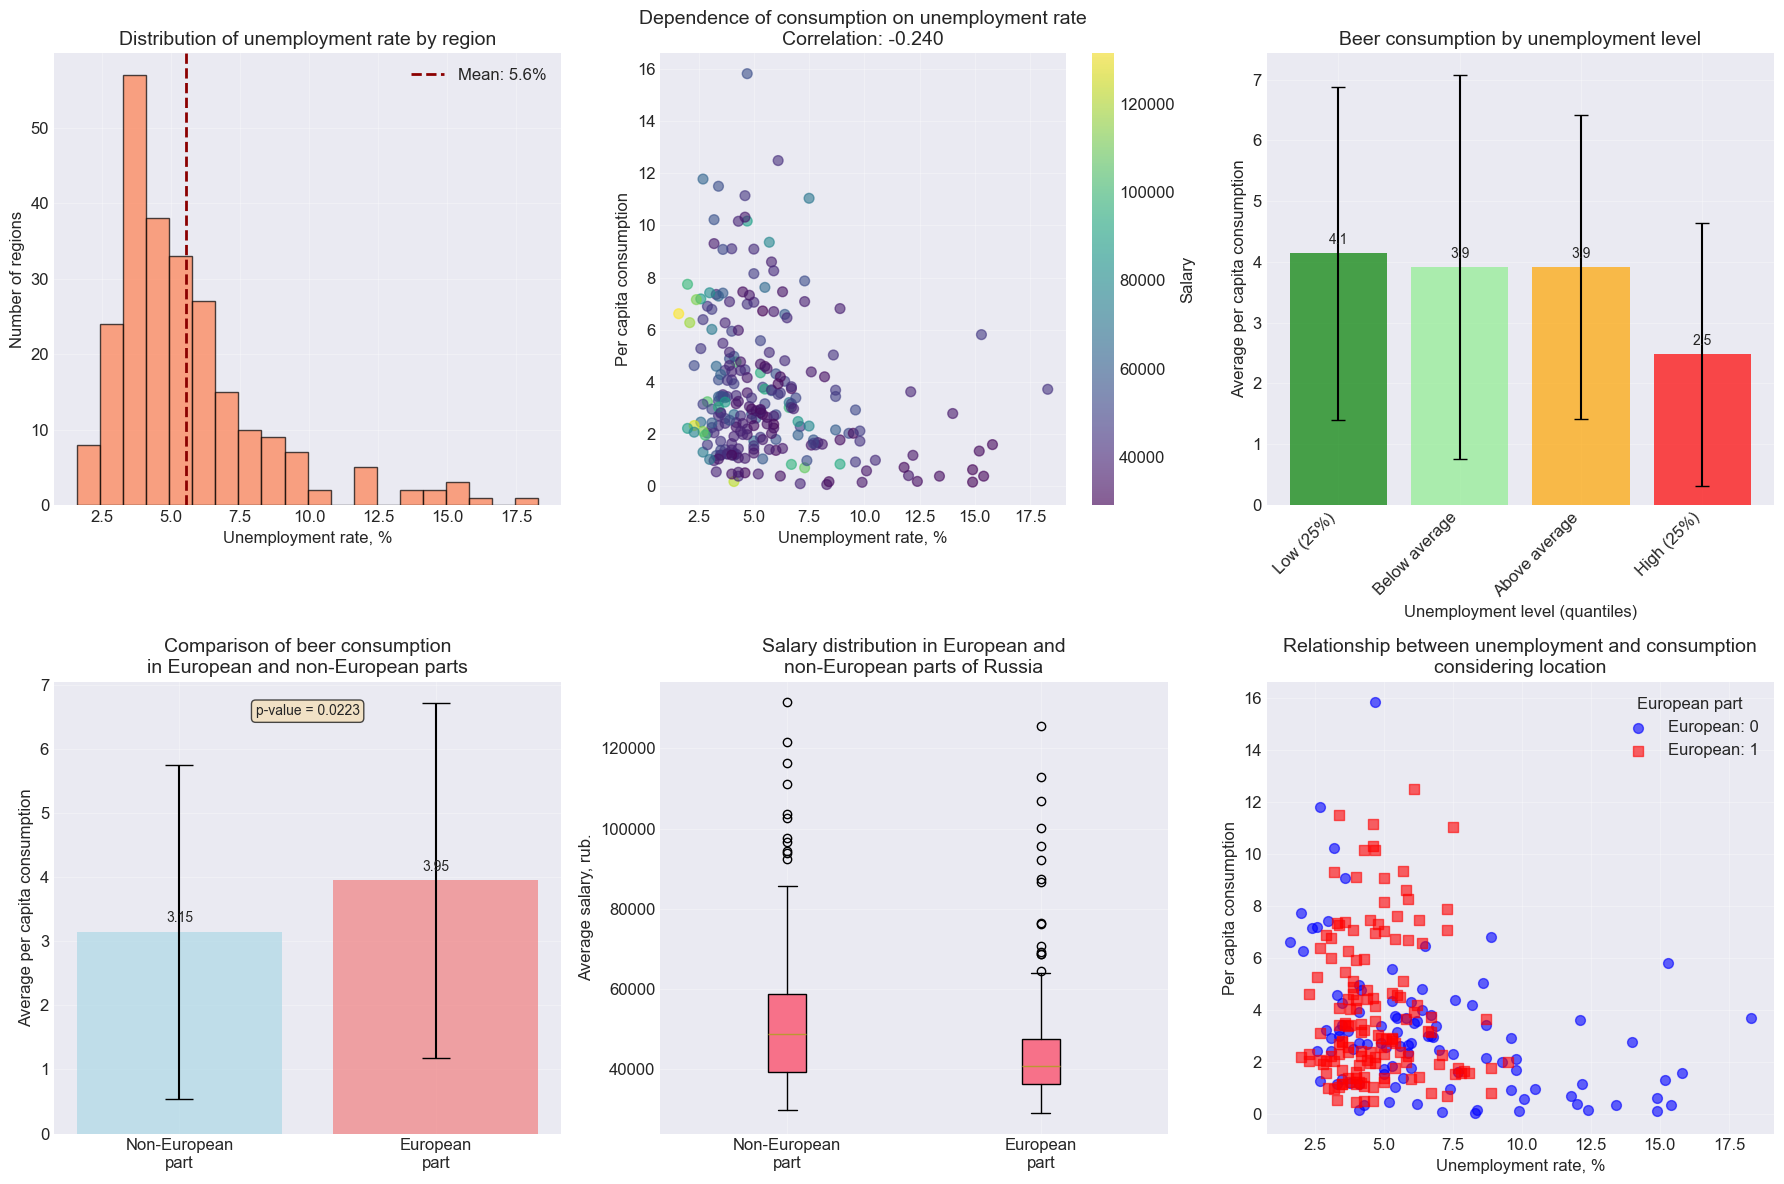


Unemployment-consumption correlation by years:
  Year 2020: -0.247
  Year 2021: -0.249
  Year 2022: -0.273

Top-10 regions with highest unemployment:
                                      mean
Округ Регион                              
Республика Дагестан                  14.40
Республика Тыва                      14.40
Республика Северная Осетия - Алания  13.60
Карачаево-Черкесская Республика      12.40
Кабардино-Балкарская Республика      12.27
Республика Алтай                     11.97
Забайкальский край                    9.27
Республика Бурятия                    9.17
Республика Калмыкия                   8.83
Республика Адыгея                     7.93

Top-10 regions with lowest unemployment:
                                          mean
Округ Регион                                  
Ямало-Ненецкий автономный округ           2.03
Санкт-Петербург                           2.43
Ханты-Мансийский автономный округ - Югра  2.53
Москва                                    2.60
Республик

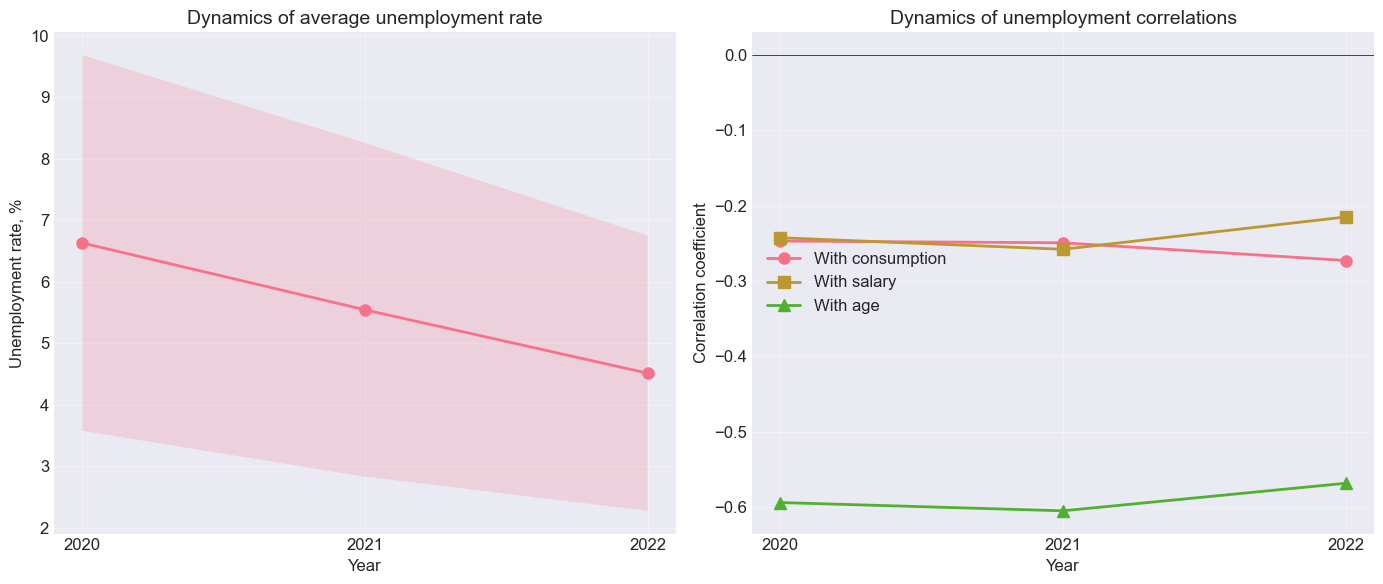


1. UNEMPLOYMENT RATE:
Correlation with beer consumption: -0.240
Consumption in regions with low unemployment: 4.14
Consumption in regions with high unemployment: 2.48

2. LOCATION IN EUROPEAN PART:
Average consumption in European part: 3.95
Average consumption in non-European part: 3.15
Difference: 0.80
Statistical significance of differences: (p=0.0223)


In [7]:
# Unemployment rate analysis

print("\n1. Basic statistics on unemployment rate (%):")
print(f"Mean value: {df_clean['Уровень безработицы, %'].mean():.2f}%")
print(f"Median: {df_clean['Уровень безработицы, %'].median():.2f}%")
print(f"Minimum value: {df_clean['Уровень безработицы, %'].min():.2f}%")
print(f"Maximum value: {df_clean['Уровень безработицы, %'].max():.2f}%")
print(f"Standard deviation: {df_clean['Уровень безработицы, %'].std():.2f}%")

# Correlation of unemployment with consumption
corr_unemployment = df_clean['Уровень безработицы, %'].corr(df_clean['Потребление на Душу'])
print(f"\n2. Correlation between unemployment rate and consumption: {corr_unemployment:.3f}")

# Correlation of unemployment with other factors
print("\n3. Correlation of unemployment with other indicators:")
correlations_unemployment = df_clean[['Уровень безработицы, %', 'Потребление на Душу', 'Зарплата', 
                                      'Мужчины', 'Средний возраст']].corr()
print(correlations_unemployment['Уровень безработицы, %'].sort_values(ascending=False))

# Analysis by unemployment quantiles
print("\n4. Beer consumption by unemployment rate quantiles:")
df_clean['Безработица_квантиль'] = pd.qcut(df_clean['Уровень безработицы, %'], q=4, 
                                          labels=['Low (25%)', 'Below average', 'Above average', 'High (25%)'])
unemployment_consumption = df_clean.groupby('Безработица_квантиль')['Потребление на Душу'].agg(['mean', 'std', 'count']).round(2)
print(unemployment_consumption)

# Region distribution
european_regions = df_clean['Еврпрейский регион'].value_counts()
print(f"\n1. Region distribution:")
print(f"   Non-European part (0): {european_regions[0]} regions")
print(f"   European part (1): {european_regions[1]} regions")
print(f"   Total: {len(df_clean)} records")

# Beer consumption comparison
print("\n2. Beer consumption comparison:")
european_stats = df_clean.groupby('Еврпрейский регион')['Потребление на Душу'].agg(['mean', 'std', 'median', 'count']).round(2)
print(european_stats)

# Check statistical significance of differences
from scipy import stats

group_0 = df_clean[df_clean['Еврпрейский регион'] == 0]['Потребление на Душу']
group_1 = df_clean[df_clean['Еврпрейский регион'] == 1]['Потребление на Душу']

t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
print(f"\n   t-test for consumption differences: t={t_stat:.3f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("   Differences are statistically significant (p < 0.05)")
else:
    print("   Differences are not statistically significant")

print("\n3. Comparison of other socio-economic indicators:")
comparison_metrics = ['Зарплата', 'Уровень безработицы, %', 'Мужчины', 'Средний возраст']
comparison_results = df_clean.groupby('Еврпрейский регион')[comparison_metrics].mean().round(2)
print(comparison_results)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution of unemployment rate
ax1 = axes[0, 0]
df_clean['Уровень безработицы, %'].hist(bins=20, alpha=0.7, color='coral', edgecolor='black', ax=ax1)
ax1.axvline(df_clean['Уровень безработицы, %'].mean(), color='darkred', linestyle='--', linewidth=2,
            label=f'Mean: {df_clean["Уровень безработицы, %"].mean():.1f}%')
ax1.set_title('Distribution of unemployment rate by region', fontsize=14)
ax1.set_xlabel('Unemployment rate, %')
ax1.set_ylabel('Number of regions')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Correlation of unemployment with consumption
ax2 = axes[0, 1]
scatter = ax2.scatter(df_clean['Уровень безработицы, %'], df_clean['Потребление на Душу'],
                      alpha=0.6, c=df_clean['Зарплата'], cmap='viridis', s=50)
ax2.set_title(f'Dependence of consumption on unemployment rate\nCorrelation: {corr_unemployment:.3f}', fontsize=14)
ax2.set_xlabel('Unemployment rate, %')
ax2.set_ylabel('Per capita consumption')
plt.colorbar(scatter, ax=ax2, label='Salary')
ax2.grid(True, alpha=0.3)

# Consumption by unemployment quantiles
ax3 = axes[0, 2]
x_pos = range(len(unemployment_consumption))
bars = ax3.bar(x_pos, unemployment_consumption['mean'], yerr=unemployment_consumption['std'],
               capsize=5, alpha=0.7, color=['green', 'lightgreen', 'orange', 'red'])
ax3.set_xticks(x_pos)
ax3.set_xticklabels(unemployment_consumption.index, rotation=45, ha='right')
ax3.set_title('Beer consumption by unemployment level', fontsize=14)
ax3.set_xlabel('Unemployment level (quantiles)')
ax3.set_ylabel('Average per capita consumption')
ax3.grid(True, alpha=0.3)
for i, (bar, mean_val) in enumerate(zip(bars, unemployment_consumption['mean'])):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{mean_val:.1f}', ha='center', va='bottom', fontsize=10)

# Consumption comparison in European and non-European parts
ax4 = axes[1, 0]
group_labels = ['Non-European\npart', 'European\npart']
group_means = [group_0.mean(), group_1.mean()]
group_stds = [group_0.std(), group_1.std()]
bars = ax4.bar(group_labels, group_means, yerr=group_stds,
               capsize=10, alpha=0.7, color=['lightblue', 'lightcoral'])
ax4.set_title('Comparison of beer consumption\nin European and non-European parts', fontsize=14)
ax4.set_ylabel('Average per capita consumption')
ax4.grid(True, alpha=0.3)


for i, (bar, mean_val) in enumerate(zip(bars, group_means)):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{mean_val:.2f}', ha='center', va='bottom', fontsize=10)
ax4.text(0.5, 0.95, f'p-value = {p_value:.4f}', transform=ax4.transAxes,
         fontsize=10, ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# Salary distribution by groups
ax5 = axes[1, 1]
european_salaries = df_clean[df_clean['Еврпрейский регион'] == 1]['Зарплата']
non_european_salaries = df_clean[df_clean['Еврпрейский регион'] == 0]['Зарплата']

ax5.boxplot([non_european_salaries, european_salaries], 
            labels=['Non-European\npart', 'European\npart'],
            patch_artist=True)
ax5.set_title('Salary distribution in European and\nnon-European parts of Russia', fontsize=14)
ax5.set_ylabel('Average salary, rub.')
ax5.grid(True, alpha=0.3)

# Joint influence of unemployment and location on consumption
ax6 = axes[1, 2]
colors = ['blue', 'red']
markers = ['o', 's']

for i, (european, color) in enumerate(zip([0, 1], colors)):
    subset = df_clean[df_clean['Еврпрейский регион'] == european]
    ax6.scatter(subset['Уровень безработицы, %'], subset['Потребление на Душу'],
                alpha=0.6, color=color, s=50, label=f'European: {european}',
                marker=markers[i])

ax6.set_title('Relationship between unemployment and consumption\nconsidering location', fontsize=14)
ax6.set_xlabel('Unemployment rate, %')
ax6.set_ylabel('Per capita consumption')
ax6.legend(title='European part')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Dynamics of unemployment-consumption correlations by year
print("\nUnemployment-consumption correlation by years:")
years = sorted(df_clean['Год'].unique())
for year in years:
    year_data = df_clean[df_clean['Год'] == year]
    corr_year = year_data['Уровень безработицы, %'].corr(year_data['Потребление на Душу'])
    print(f"  Year {year}: {corr_year:.3f}")

# Analysis of regions with extreme unemployment values

# Regions with highest unemployment (average over 3 years)
region_unemployment = df_clean.groupby('Округ Регион')['Уровень безработицы, %'].agg(['mean', 'std', 'count'])
region_unemployment = region_unemployment[region_unemployment['count'] == 3]  # Only complete series

print("\nTop-10 regions with highest unemployment:")
print(region_unemployment.nlargest(10, 'mean')[['mean']].round(2))

print("\nTop-10 regions with lowest unemployment:")
print(region_unemployment.nsmallest(10, 'mean')[['mean']].round(2))

# Analysis of relationship between unemployment and other factors in dynamics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Dynamics of average unemployment by years
ax1 = axes[0]
unemployment_by_year = df_clean.groupby('Год')['Уровень безработицы, %'].agg(['mean', 'std'])
ax1.plot(unemployment_by_year.index, unemployment_by_year['mean'], marker='o', linewidth=2, markersize=8)
ax1.fill_between(unemployment_by_year.index,
                 unemployment_by_year['mean'] - unemployment_by_year['std'],
                 unemployment_by_year['mean'] + unemployment_by_year['std'],
                 alpha=0.2)
ax1.set_title('Dynamics of average unemployment rate', fontsize=14)
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment rate, %')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(years)

# Dynamics of correlations
ax2 = axes[1]
correlations_by_year = []
for year in years:
    year_data = df_clean[df_clean['Год'] == year]
    correlations = {
        'Год': year,
        'Безработица-Потребление': year_data['Уровень безработицы, %'].corr(year_data['Потребление на Душу']),
        'Безработица-Зарплата': year_data['Уровень безработицы, %'].corr(year_data['Зарплата']),
        'Безработица-Возраст': year_data['Уровень безработицы, %'].corr(year_data['Средний возраст'])
    }
    correlations_by_year.append(correlations)

corr_df = pd.DataFrame(correlations_by_year)

x = range(len(years))
ax2.plot(x, corr_df['Безработица-Потребление'], marker='o', linewidth=2, markersize=8, label='With consumption')
ax2.plot(x, corr_df['Безработица-Зарплата'], marker='s', linewidth=2, markersize=8, label='With salary')
ax2.plot(x, corr_df['Безработица-Возраст'], marker='^', linewidth=2, markersize=8, label='With age')
ax2.set_xticks(x)
ax2.set_xticklabels(years)
ax2.set_title('Dynamics of unemployment correlations', fontsize=14)
ax2.set_xlabel('Year')
ax2.set_ylabel('Correlation coefficient')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n1. UNEMPLOYMENT RATE:")
print(f"Correlation with beer consumption: {corr_unemployment:.3f}")
print(f"Consumption in regions with low unemployment: {unemployment_consumption.loc['Low (25%)', 'mean']:.2f}")
print(f"Consumption in regions with high unemployment: {unemployment_consumption.loc['High (25%)', 'mean']:.2f}")

print(f"\n2. LOCATION IN EUROPEAN PART:")
print(f"Average consumption in European part: {group_1.mean():.2f}")
print(f"Average consumption in non-European part: {group_0.mean():.2f}")
print(f"Difference: {group_1.mean() - group_0.mean():.2f}")
print(f"Statistical significance of differences: (p={p_value:.4f})")